In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
pip install openpyxl


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/online_retail_II.xlsx')

# Display the first few rows of the dataset
print(df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [5]:
# Check the shape of the dataset
print(df.shape)

# Display information about the dataset
print(df.info())

# Summary statistics of the dataset
print(df.describe())


(525461, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%        

In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing Customer ID
df = df.dropna(subset=['Customer ID'])
print(df.isnull().sum())


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [7]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove rows with negative or zero Quantity
df = df[df['Quantity'] > 0]

# Remove rows with negative or zero Price
df = df[df['Price'] > 0]

# Reset index
df = df.reset_index(drop=True)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407664 entries, 0 to 407663
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  int64         
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   Customer ID  407664 non-null  float64       
 7   Country      407664 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.9+ MB
None


<ipython-input-7-7f289b522d33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


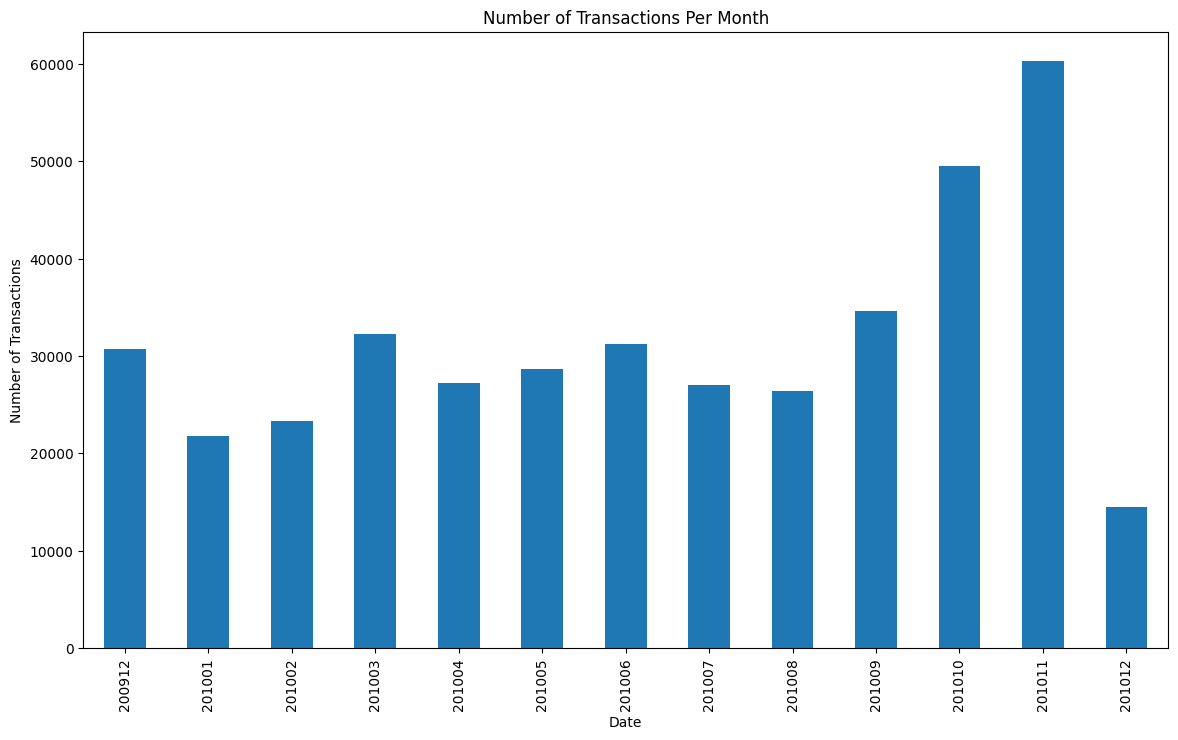

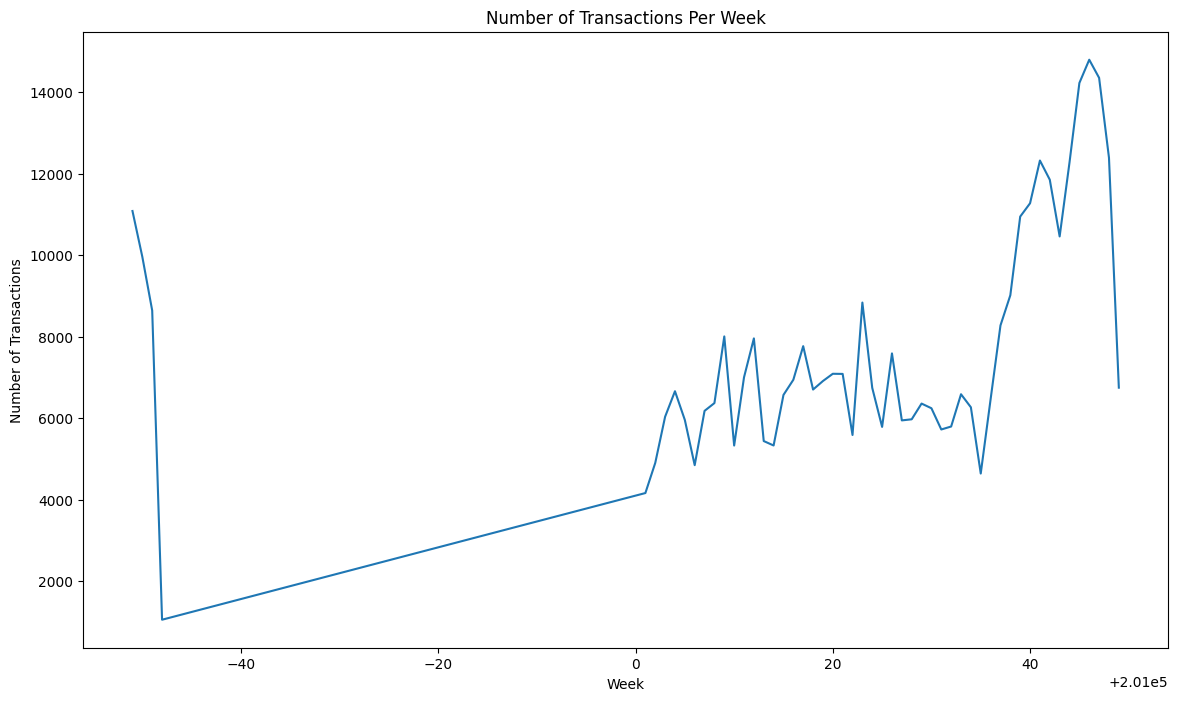

In [8]:
# Extract date features
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['InvoiceYearWeek'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.week)

# Plot the number of transactions per month
plt.figure(figsize=(14,8))
df.groupby('InvoiceYearMonth')['Invoice'].count().plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Per Month')
plt.show()

# Plot the number of transactions per week
plt.figure(figsize=(14,8))
df.groupby('InvoiceYearWeek')['Invoice'].count().plot(kind='line')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Per Week')
plt.show()


Description
WHITE HANGING HEART T-LIGHT HOLDER    56915
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54754
BROCADE RING PURSE                    48166
PACK OF 72 RETRO SPOT CAKE CASES      45156
ASSORTED COLOUR BIRD ORNAMENT         44551
60 TEATIME FAIRY CAKE CASES           35806
PACK OF 60 PINK PAISLEY CAKE CASES    31006
JUMBO BAG RED RETROSPOT               29578
SMALL POPCORN HOLDER                  25718
BLACK AND WHITE PAISLEY FLOWER MUG    25685
Name: Quantity, dtype: int64


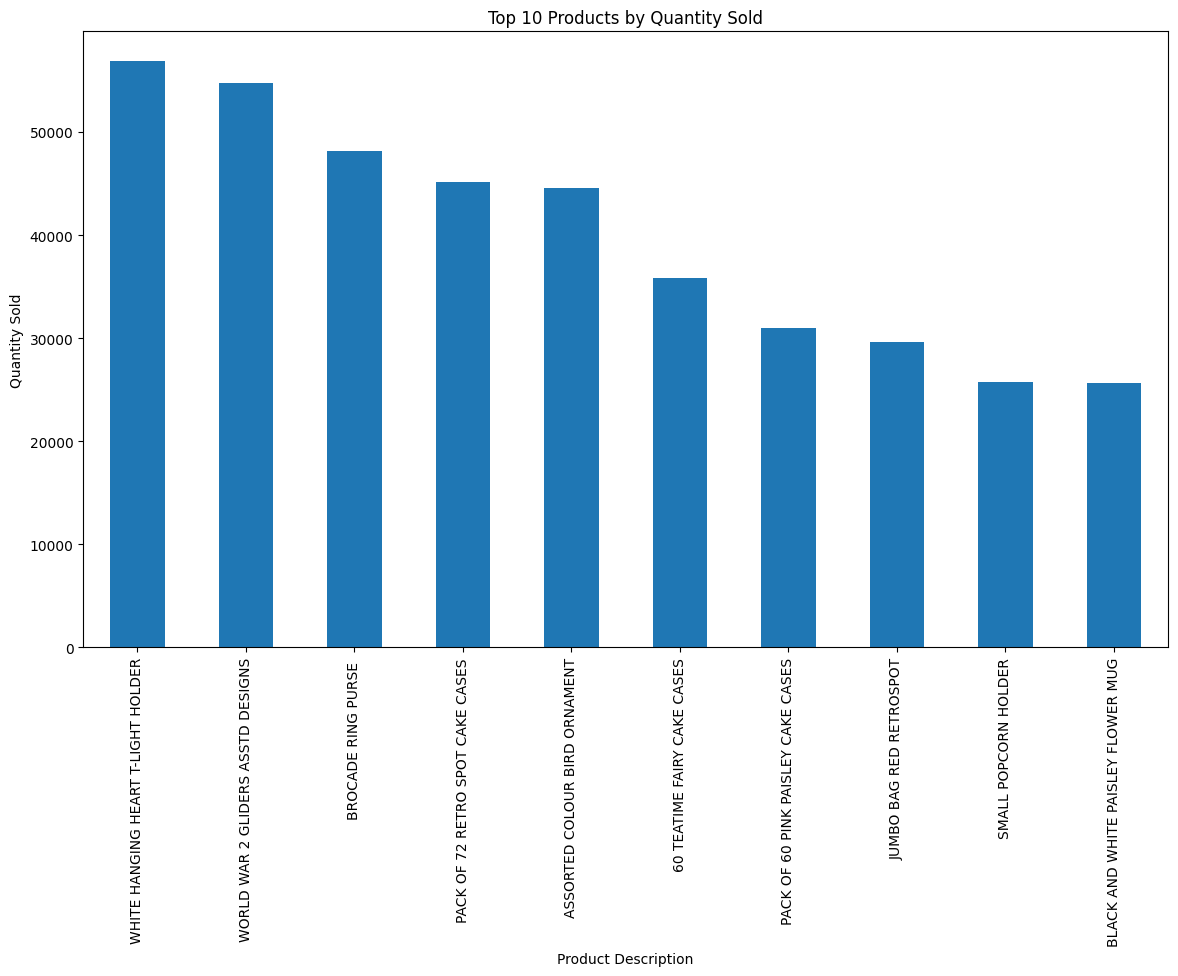

In [9]:
# Top 10 products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Plot top 10 products
plt.figure(figsize=(14,8))
top_products.plot(kind='bar')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.show()


Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Sweden              53171.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: Revenue, dtype: float64


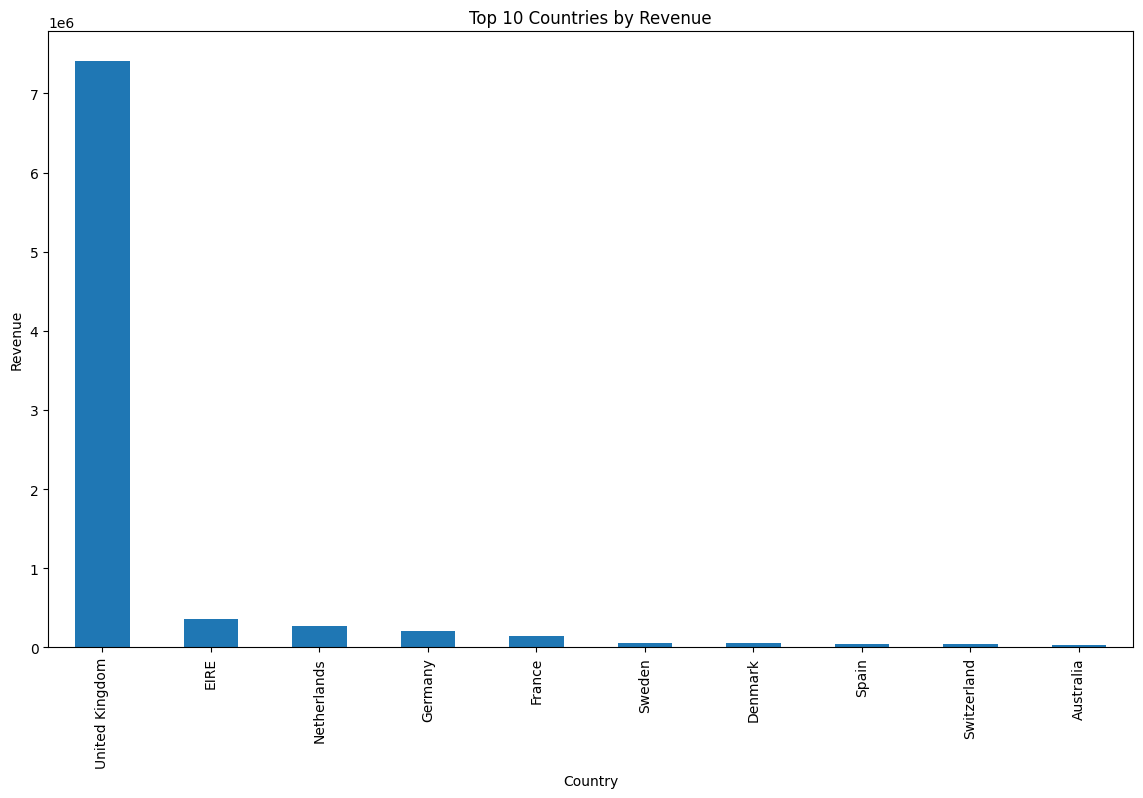

In [10]:
# Calculate revenue
df['Revenue'] = df['Quantity'] * df['Price']

# Top 10 countries by revenue
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_countries)

# Plot top 10 countries
plt.figure(figsize=(14,8))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Top 10 Countries by Revenue')
plt.show()


In [11]:
# Latest date in the dataset
latest_date = df['InvoiceDate'].max()

# Calculate Recency, Frequency, and Monetary value for each customer
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'Invoice': 'count',
    'Revenue': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'Revenue': 'Monetary'})

print(rfm.head())


             Recency  Frequency  Monetary
Customer ID                              
12346.0          164         33    372.86
12347.0            2         71   1323.32
12348.0           73         20    222.16
12349.0           42        102   2671.14
12351.0           10         21    300.93


In [12]:
# Assign scores from 1 to 4
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
print(rfm.head())

# Segment customers
rfm['Segment'] = 'Low-Value'
rfm.loc[rfm['RFM_Score'] == '444', 'Segment'] = 'High-Value'
rfm.loc[rfm['RFM_Score'].isin(['344', '434', '443']), 'Segment'] = 'Mid-Value'
print(rfm.groupby('Segment').size())


             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
Customer ID                                                                
12346.0          164         33    372.86       1       2       2       122
12347.0            2         71   1323.32       4       3       3       433
12348.0           73         20    222.16       2       2       1       221
12349.0           42        102   2671.14       3       3       4       334
12351.0           10         21    300.93       4       2       1       421
Segment
High-Value     407
Low-Value     3494
Mid-Value      411
dtype: int64


<ipython-input-13-477e9c7b409d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=rfm, palette='viridis')


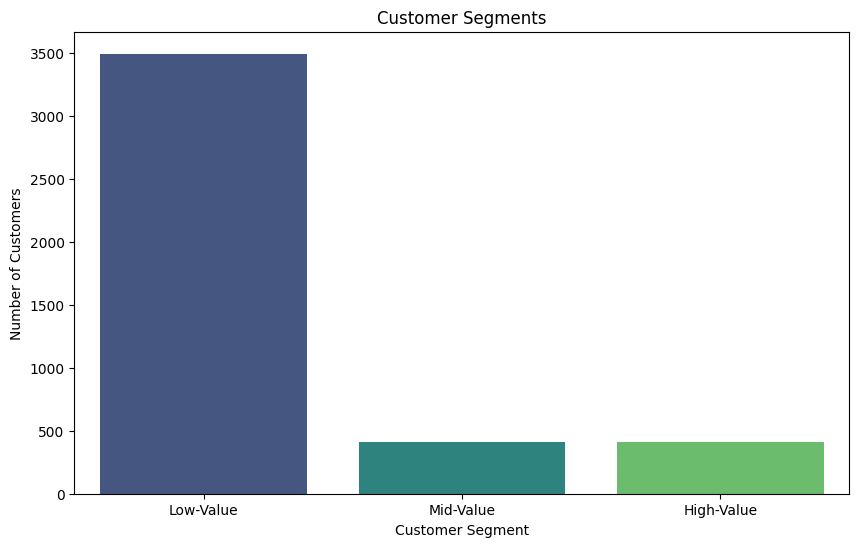

In [13]:
# Plot customer segments
plt.figure(figsize=(10,6))
sns.countplot(x='Segment', data=rfm, palette='viridis')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segments')
plt.show()


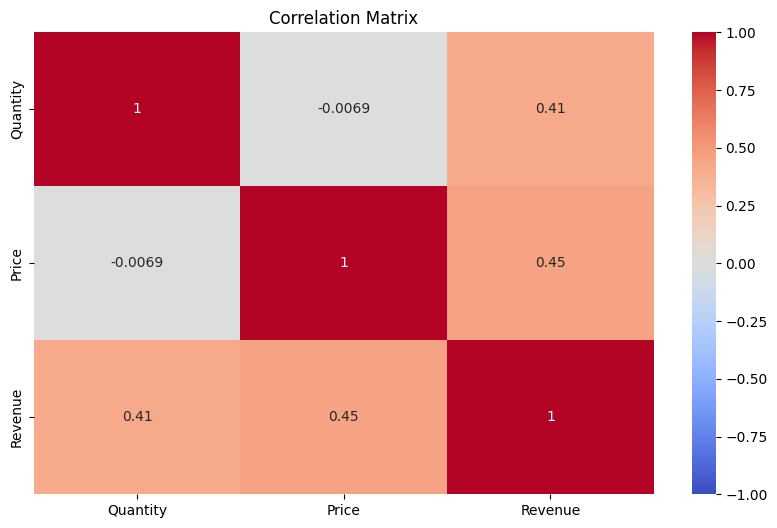

In [14]:
# Correlation matrix
corr = df[['Quantity', 'Price', 'Revenue']].corr()

# Plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


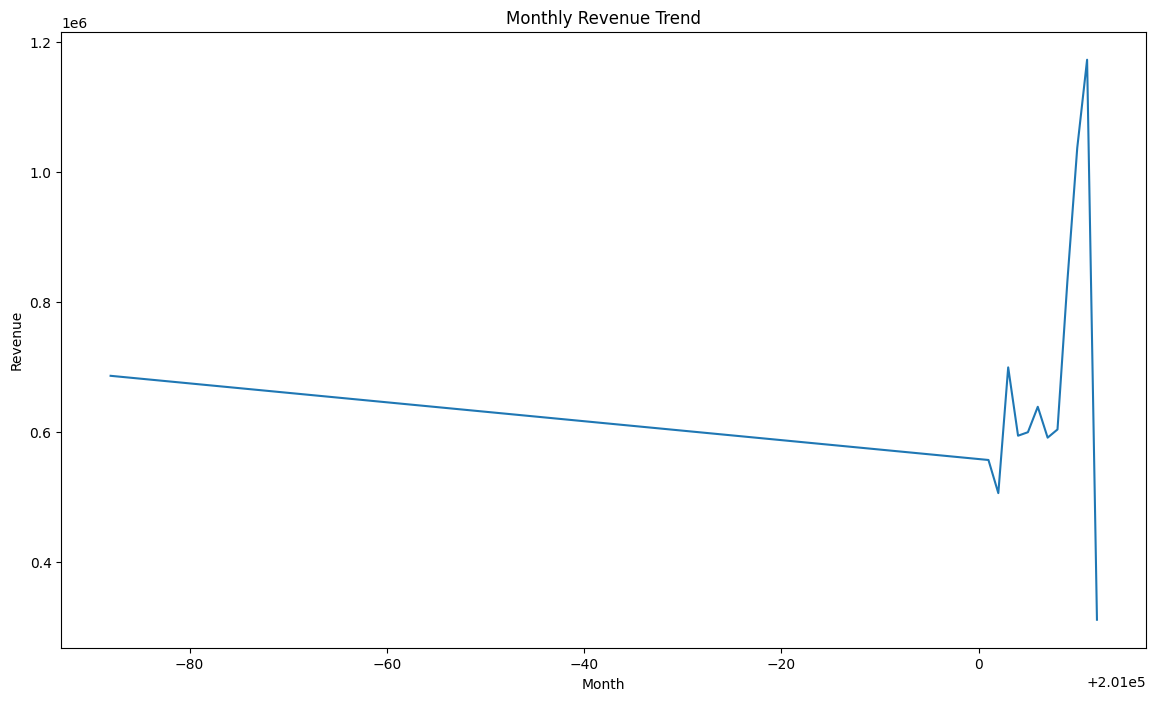

In [15]:
# Monthly revenue
monthly_revenue = df.groupby('InvoiceYearMonth')['Revenue'].sum()

# Plot monthly revenue
plt.figure(figsize=(14,8))
monthly_revenue.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.show()


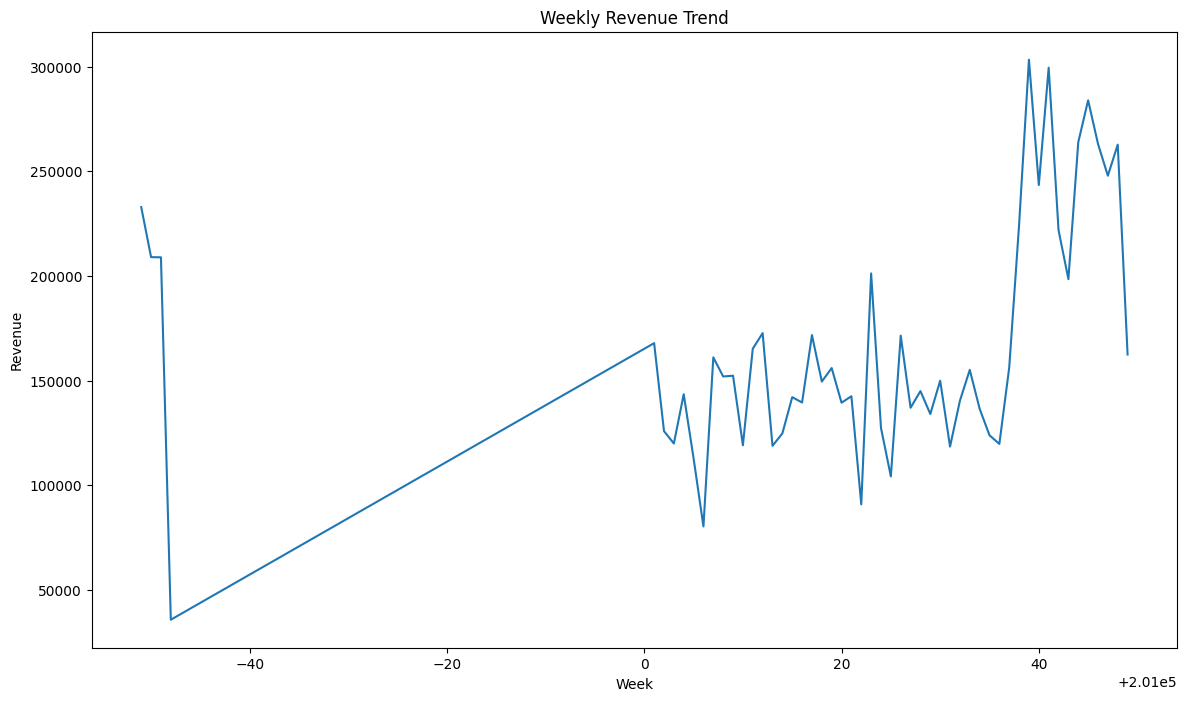

In [16]:
# Weekly revenue
weekly_revenue = df.groupby('InvoiceYearWeek')['Revenue'].sum()

# Plot weekly revenue
plt.figure(figsize=(14,8))
weekly_revenue.plot(kind='line')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Weekly Revenue Trend')
plt.show()


<ipython-input-17-0b306a6ef784>:16: FutureWarning: The provided callable <function sum at 0x7e553e97ae60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cohort_data = df.groupby(['CohortMonth', 'CohortIndex']).agg({


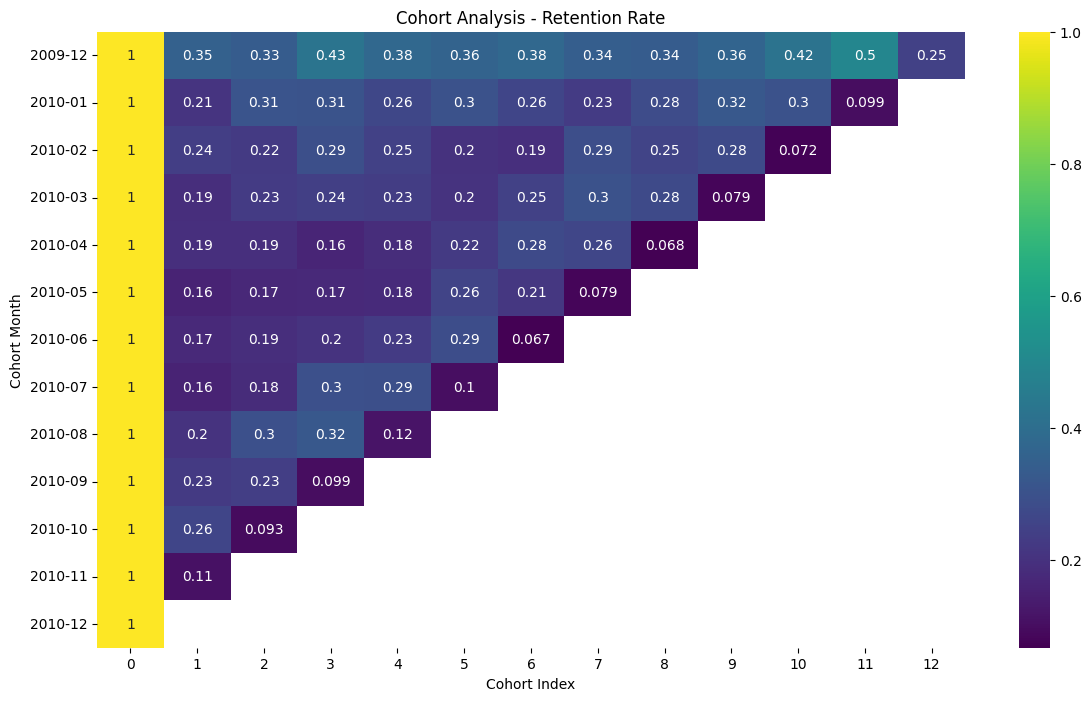

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month and year of each transaction
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Create a new column for cohort
df['CohortMonth'] = df.groupby('Customer ID')['InvoiceMonth'].transform('min')

# Calculate the difference in months between the InvoiceMonth and the CohortMonth
df['CohortIndex'] = (df['InvoiceMonth'] - df['CohortMonth']).apply(lambda x: x.n)

# Group by CohortMonth and CohortIndex
cohort_data = df.groupby(['CohortMonth', 'CohortIndex']).agg({
    'Customer ID': pd.Series.nunique,
    'Invoice': pd.Series.nunique,
    'Quantity': np.sum,
    'Revenue': np.sum
}).reset_index()

# Pivot table for cohort analysis
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='Customer ID')

# Plot cohort retention rate
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

plt.figure(figsize=(14,8))
sns.heatmap(retention_matrix, annot=True, cmap='viridis')
plt.title('Cohort Analysis - Retention Rate')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()


### Define the Target Variable
Since our goal is to analyze customer retention, we need to define what constitutes a "retained" customer versus a "churned" customer. One common approach is to define retention based on the recency of a customer's last purchase. For example, if a customer has not made a purchase in the last 6 months, they might be considered churned.

In [18]:
# Define the threshold for churn (e.g., 6 months)
churn_threshold = 180  # days

# Calculate the days since the last purchase for each customer
latest_date = df['InvoiceDate'].max()
df['DaysSinceLastPurchase'] = df.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (latest_date - x.max()).days)

# Create the churn indicator
df['Churn'] = df['DaysSinceLastPurchase'].apply(lambda x: 1 if x <= churn_threshold else 0)

# Drop duplicate rows for each customer to get unique entries
df_unique = df.drop_duplicates(subset=['Customer ID'])

# Display the first few rows of the new dataframe
print(df_unique[['Customer ID', 'DaysSinceLastPurchase', 'Churn']].head())


    Customer ID  DaysSinceLastPurchase  Churn
0       13085.0                    314      0
12      13078.0                      1      1
31      15362.0                     83      1
54      18102.0                      0      1
71      12682.0                      0      1


In [19]:
# Recency: Days since last purchase
df_unique['Recency'] = df_unique['DaysSinceLastPurchase']

# Frequency: Number of purchases
df_unique['Frequency'] = df.groupby('Customer ID')['Invoice'].transform('count')

# Monetary: Total spent
df_unique['Monetary'] = df.groupby('Customer ID')['Revenue'].transform('sum')

# Drop the 'DaysSinceLastPurchase' column as we have already used it to create Recency
df_unique = df_unique.drop(columns=['DaysSinceLastPurchase'])


<ipython-input-19-b4349cb8d103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Recency'] = df_unique['DaysSinceLastPurchase']
<ipython-input-19-b4349cb8d103>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Frequency'] = df.groupby('Customer ID')['Invoice'].transform('count')
<ipython-input-19-b4349cb8d103>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [20]:
# Average order value (AOV)
df_unique['AOV'] = df_unique['Monetary'] / df_unique['Frequency']


In [21]:
# Number of distinct products purchased
df_unique['NumDistinctProducts'] = df.groupby('Customer ID')['StockCode'].nunique()


In [22]:
# One-hot encode the 'Country' column
df_unique = pd.get_dummies(df_unique, columns=['Country'], drop_first=True)


In [23]:
# List of features
features = ['Recency', 'Frequency', 'Monetary', 'AOV', 'NumDistinctProducts'] + [col for col in df_unique.columns if col.startswith('Country_')]

# Select the features and the target variable
X = df_unique[features]
y = df_unique['Churn']

# Display the first few rows of the features and the target variable
print(X.head())
print(y.head())


    Recency  Frequency   Monetary         AOV  NumDistinctProducts  \
0       314         62    2017.20   32.535484                  NaN   
12        1        443   16904.51   38.159165                  NaN   
31       83         40     613.08   15.327000                  NaN   
54        0        627  349164.35  556.880941                  NaN   
71        0        514   11745.69   22.851537                  NaN   

    Country_Austria  Country_Bahrain  Country_Belgium  Country_Brazil  \
0             False            False            False           False   
12            False            False            False           False   
31            False            False            False           False   
54            False            False            False           False   
71            False            False            False           False   

    Country_Canada  ...  Country_Singapore  Country_Spain  Country_Sweden  \
0            False  ...              False          False      

In [25]:
from sklearn.model_selection import train_test_split


In [26]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train)
X_test_scaled = imputer.transform(X_test)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Display the feature importances
print(feature_importances)


                              Importance
Recency                         0.856538
Monetary                        0.058135
Frequency                       0.051256
AOV                             0.022721
NumDistinctProducts             0.003527
Country_United Kingdom          0.001080
Country_Italy                   0.000739
Country_Channel Islands         0.000728
Country_Bahrain                 0.000682
Country_RSA                     0.000628
Country_Germany                 0.000621
Country_Sweden                  0.000434
Country_Norway                  0.000357
Country_Cyprus                  0.000325
Country_Portugal                0.000320
Country_France                  0.000316
Country_Spain                   0.000303
Country_Netherlands             0.000263
Country_Austria                 0.000202
Country_Belgium                 0.000188
Country_Finland                 0.000154
Country_Unspecified             0.000143
Country_Denmark                 0.000087
Country_Switzerl

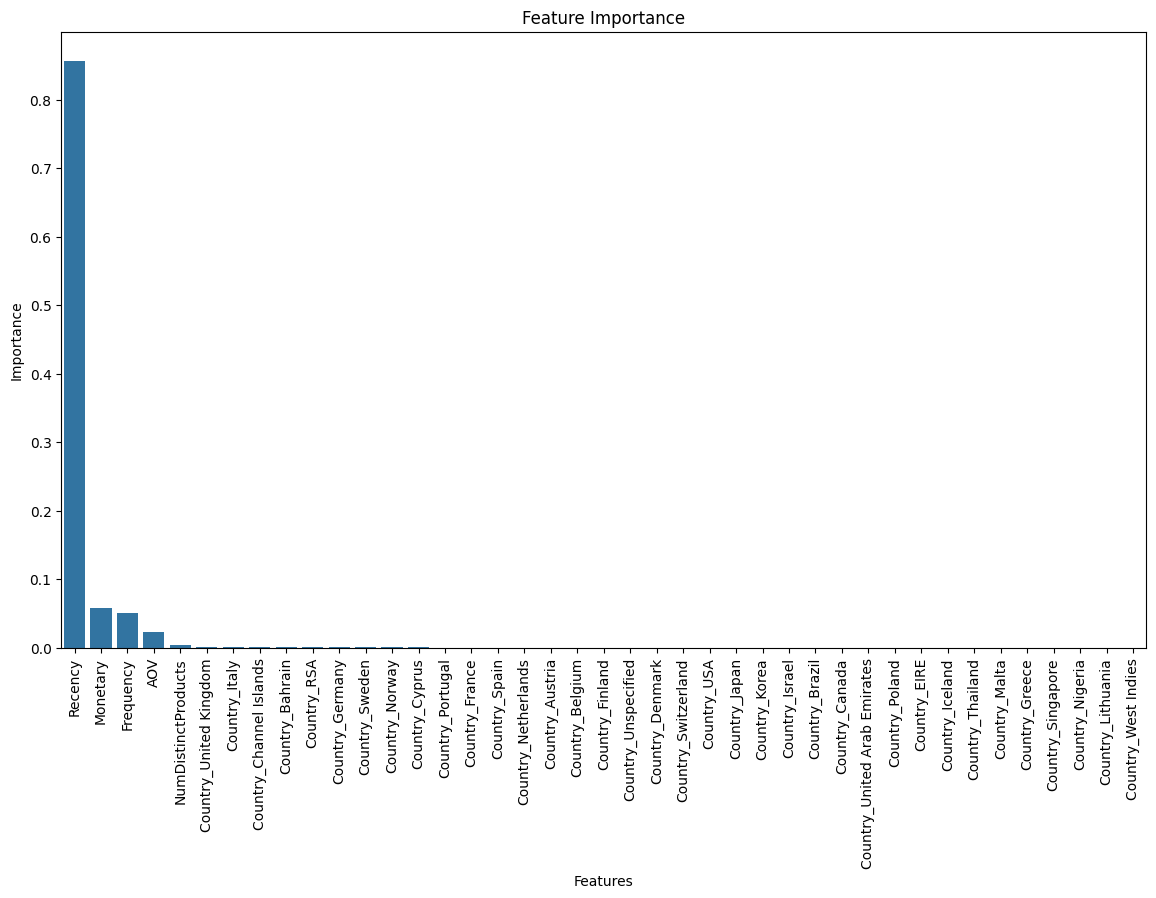

In [29]:
# Plot feature importances
plt.figure(figsize=(14,8))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


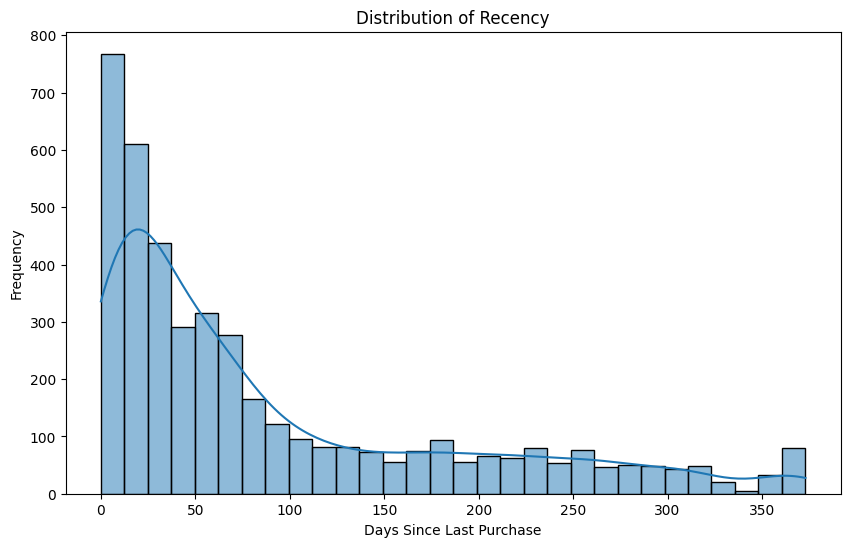

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df_unique['Recency'], bins=30, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()


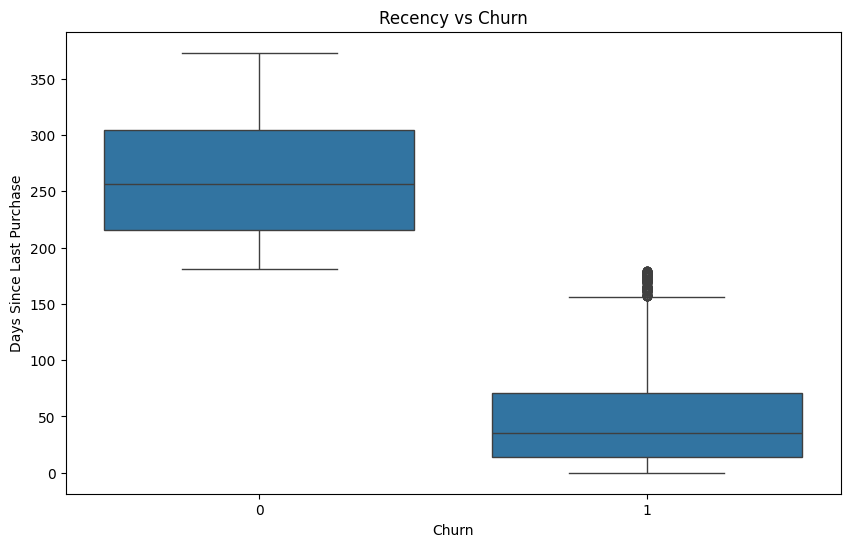

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='Recency', data=df_unique)
plt.title('Recency vs Churn')
plt.xlabel('Churn')
plt.ylabel('Days Since Last Purchase')
plt.show()


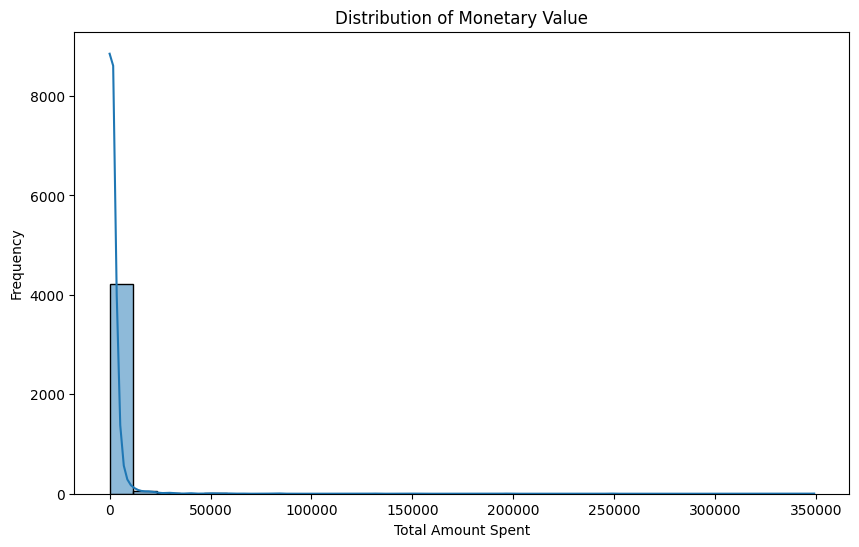

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df_unique['Monetary'], bins=30, kde=True)
plt.title('Distribution of Monetary Value')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency')
plt.show()


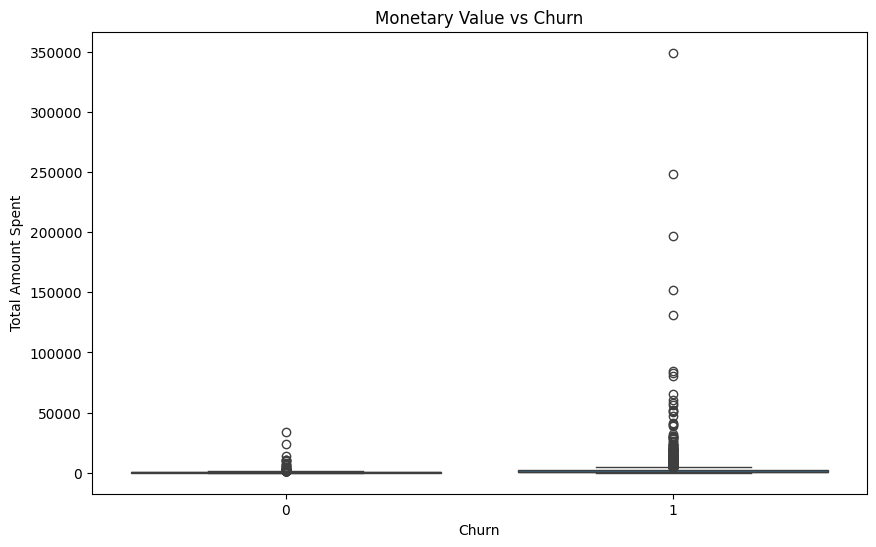

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='Monetary', data=df_unique)
plt.title('Monetary Value vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Amount Spent')
plt.show()


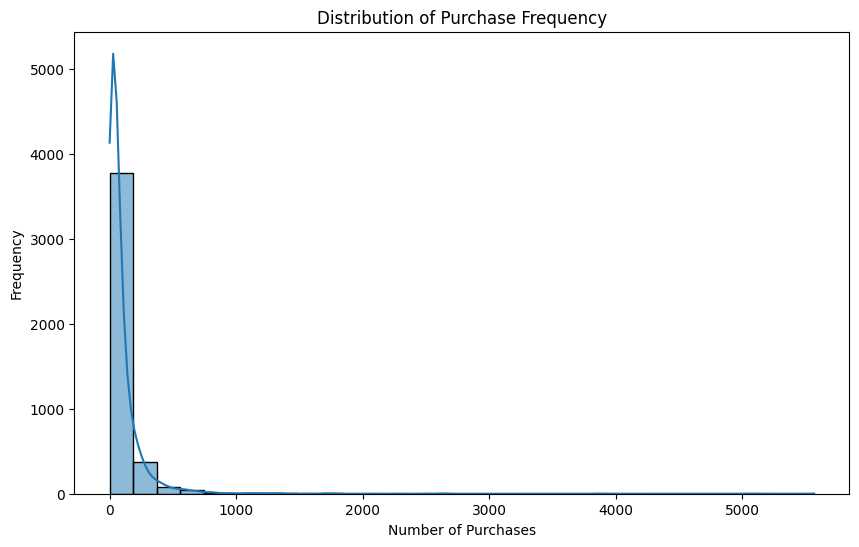

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df_unique['Frequency'], bins=30, kde=True)
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()


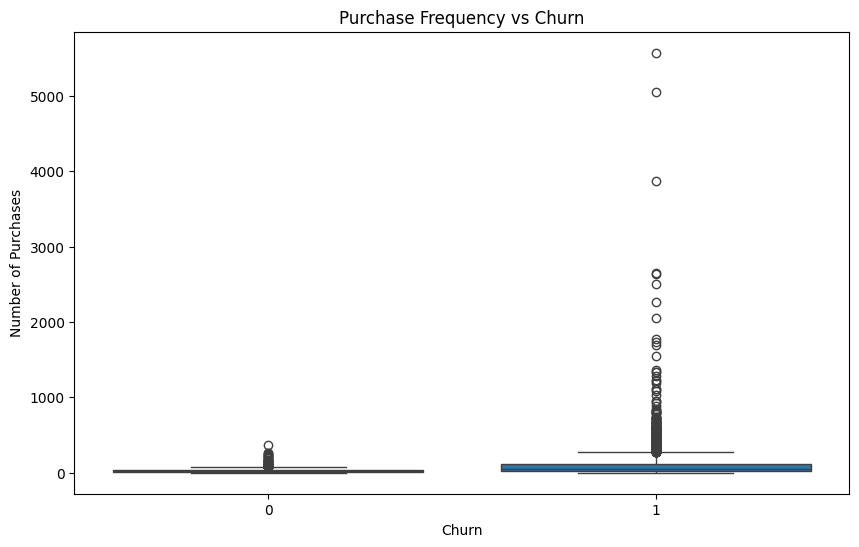

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='Frequency', data=df_unique)
plt.title('Purchase Frequency vs Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Purchases')
plt.show()


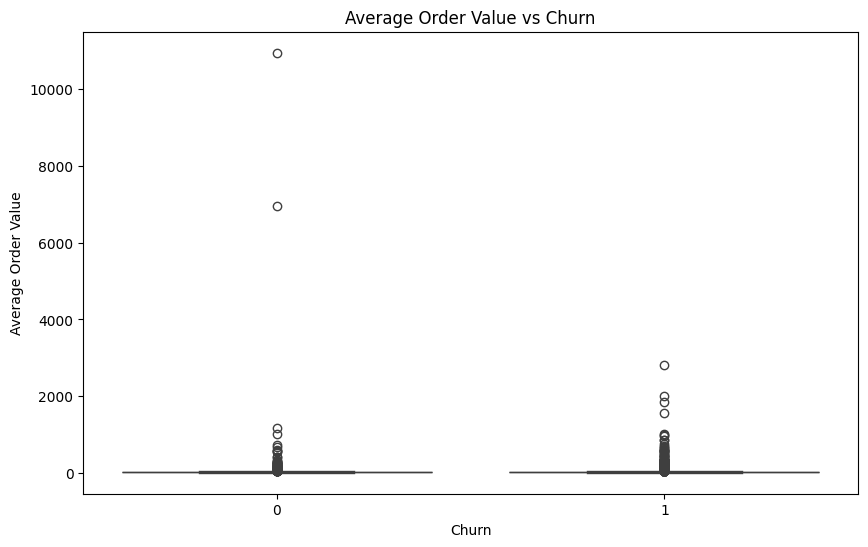

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='AOV', data=df_unique)
plt.title('Average Order Value vs Churn')
plt.xlabel('Churn')
plt.ylabel('Average Order Value')
plt.show()


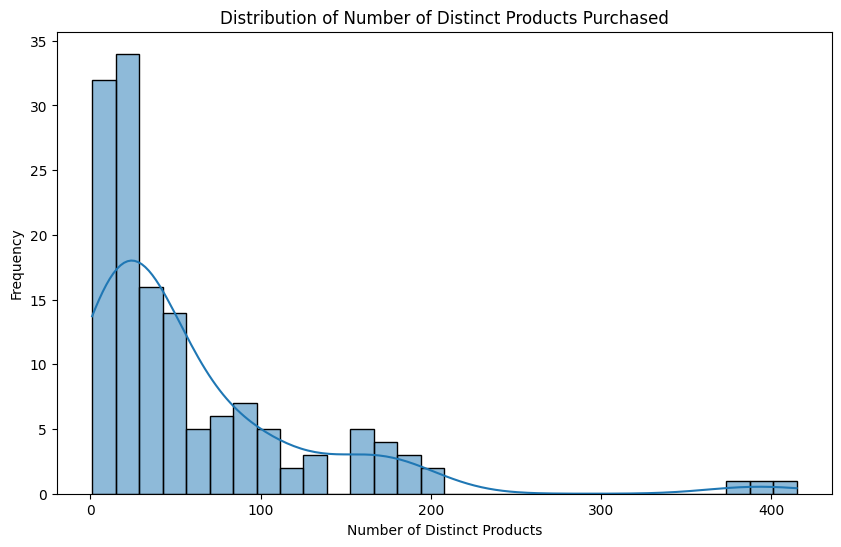

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df_unique['NumDistinctProducts'], bins=30, kde=True)
plt.title('Distribution of Number of Distinct Products Purchased')
plt.xlabel('Number of Distinct Products')
plt.ylabel('Frequency')
plt.show()


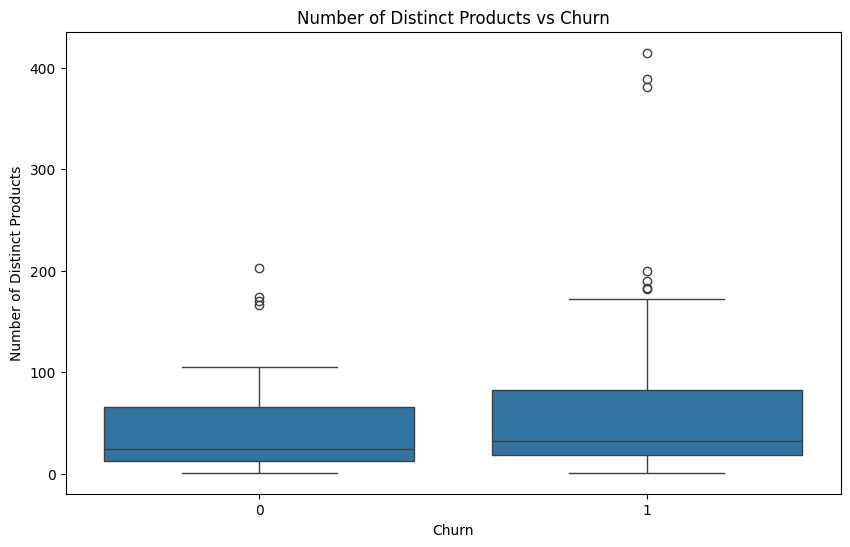

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='NumDistinctProducts', data=df_unique)
plt.title('Number of Distinct Products vs Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Distinct Products')
plt.show()


In [39]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [40]:
# Define features and target variable
features = [ 'Frequency', 'Monetary', 'AOV', 'NumDistinctProducts'] + [col for col in df_unique.columns if col.startswith('Country_')]

# features = ['Recency', 'Frequency', 'Monetary', 'AOV', 'NumDistinctProducts'] + [col for col in df_unique.columns if col.startswith('Country_')]

X = df_unique[features]
y = df_unique['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train)
X_test_scaled = imputer.transform(X_test)


In [42]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred_rf = rf.predict(X_test_scaled)


In [43]:
# Print classification report
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.42      0.24      0.30       278
           1       0.81      0.91      0.86      1016

    accuracy                           0.76      1294
   macro avg       0.61      0.57      0.58      1294
weighted avg       0.73      0.76      0.74      1294

[[ 66 212]
 [ 93 923]]
Accuracy: 0.7642967542503863


In [44]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate the Decision Tree model
print("Decision Tree Classifier")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.37      0.31      0.34       278
           1       0.82      0.86      0.84      1016

    accuracy                           0.74      1294
   macro avg       0.60      0.58      0.59      1294
weighted avg       0.72      0.74      0.73      1294

[[ 85 193]
 [143 873]]
Accuracy: 0.740340030911901


In [45]:
import xgboost as xgb

# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
xgb_model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the XGBoost model
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.49      0.21      0.30       278
           1       0.81      0.94      0.87      1016

    accuracy                           0.78      1294
   macro avg       0.65      0.58      0.58      1294
weighted avg       0.74      0.78      0.75      1294

[[ 59 219]
 [ 61 955]]
Accuracy: 0.7836166924265843


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:21:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [46]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [47]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [48]:
from sklearn.svm import SVC

# Train an SVM classifier
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the SVM model
print("SVM Classifier")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       278
           1       0.78      1.00      0.88      1016

    accuracy                           0.78      1294
   macro avg       0.39      0.50      0.44      1294
weighted avg       0.62      0.78      0.69      1294

[[   0  278]
 [   1 1015]]
Accuracy: 0.7843894899536321


In [49]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("Logistic Regression Classifier")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       278
           1       0.79      1.00      0.88      1016

    accuracy                           0.79      1294
   macro avg       0.64      0.50      0.44      1294
weighted avg       0.72      0.79      0.69      1294

[[   1  277]
 [   1 1015]]
Accuracy: 0.7851622874806801


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape data for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

# Predict the target variable on the test set
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)

# Evaluate the LSTM model
print("LSTM Classifier")
print(classification_report(y_test, y_pred_lstm))
print(confusion_matrix(y_test, y_pred_lstm))
print("Accuracy:", accuracy_score(y_test, y_pred_lstm))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7744 - loss: 0.6552 - val_accuracy: 0.7798 - val_loss: 0.5066
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8285 - loss: 0.4426 - val_accuracy: 0.7805 - val_loss: 0.4826
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8226 - loss: 0.4204 - val_accuracy: 0.7836 - val_loss: 0.4810
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8223 - loss: 0.4077 - val_accuracy: 0.7852 - val_loss: 0.4754
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8088 - loss: 0.4236 - val_accuracy: 0.7852 - val_loss: 0.4775
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8152 - loss: 0.4041 - val_accuracy: 0.7852 - val_loss: 0.4811
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8169 - loss: 0.4117 - val_accuracy: 0.7852 - val_loss: 0.4763
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8129 - loss: 0.4105 - val_accuracy: 0.7852 - val_loss: 0.4780
Ep

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define FNN model
fnn_model = Sequential()
fnn_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
fnn_model.add(Dropout(0.2))
fnn_model.add(Dense(64, activation='relu'))
fnn_model.add(Dropout(0.2))
fnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
fnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
fnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Predict the target variable on the test set
y_pred_fnn = (fnn_model.predict(X_test_scaled) > 0.5).astype(int)

# Evaluate the FNN model
print("Feedforward Neural Network Classifier")
print(classification_report(y_test, y_pred_fnn))
print(confusion_matrix(y_test, y_pred_fnn))
print("Accuracy:", accuracy_score(y_test, y_pred_fnn))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8244 - loss: 0.5864 - val_accuracy: 0.7852 - val_loss: 0.5448
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8096 - loss: 0.4596 - val_accuracy: 0.7852 - val_loss: 0.5305
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8254 - loss: 0.4081 - val_accuracy: 0.7836 - val_loss: 0.5036
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8090 - loss: 0.4258 - val_accuracy: 0.7844 - val_loss: 0.5032
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8154 - loss: 0.4076 - val_accuracy: 0.7790 - val_loss: 0.4873
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8165 - loss: 0.4050 - val_accuracy: 0.7790 - val_loss: 0.4946
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8085 - loss: 0.4193 - val_accuracy: 0.7844 - val_loss: 0.5050
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - loss: 0.4194 - val_accuracy: 0.7852 - val_loss: 0.4905
Epo

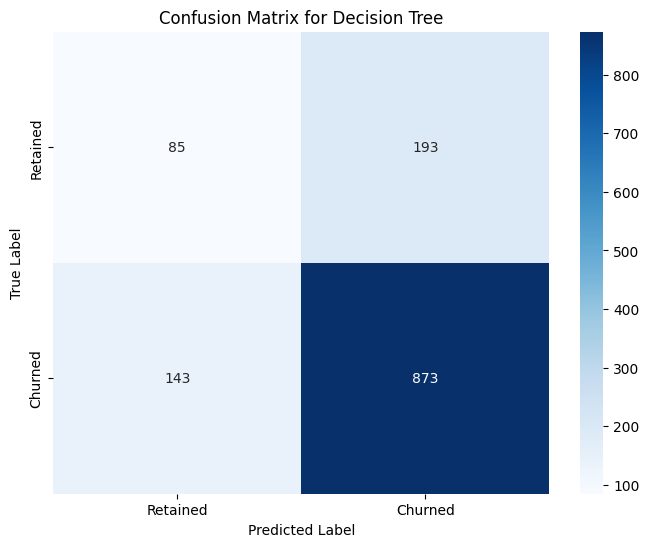

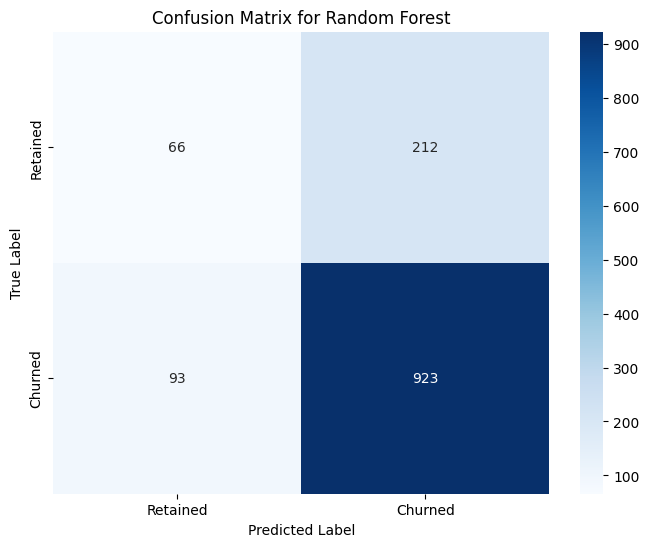

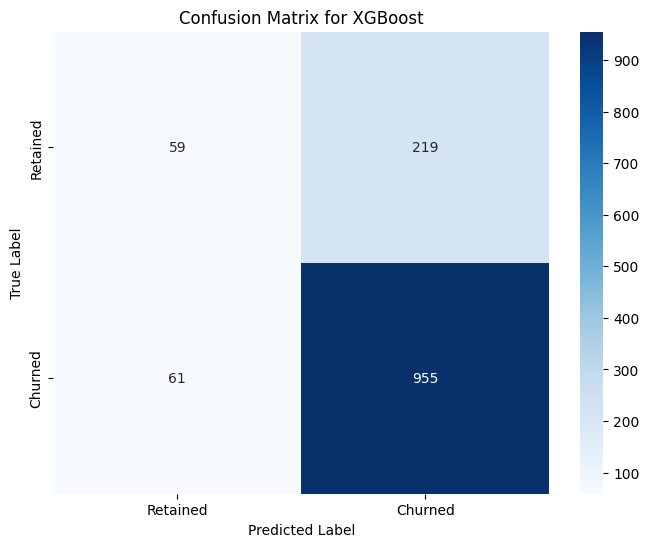

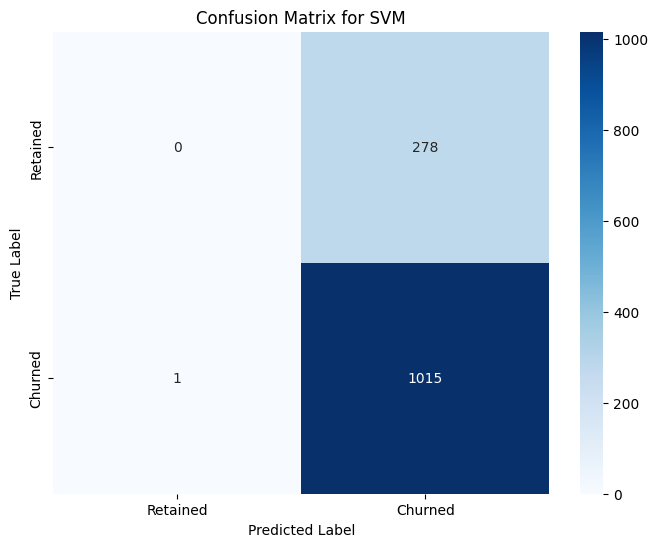

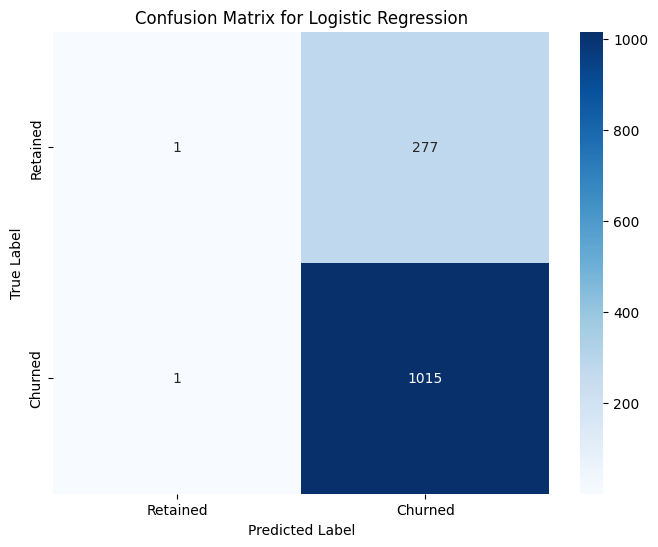

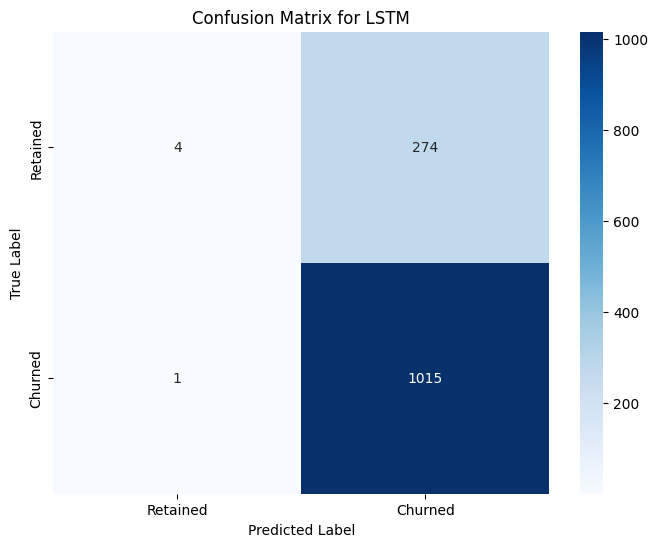

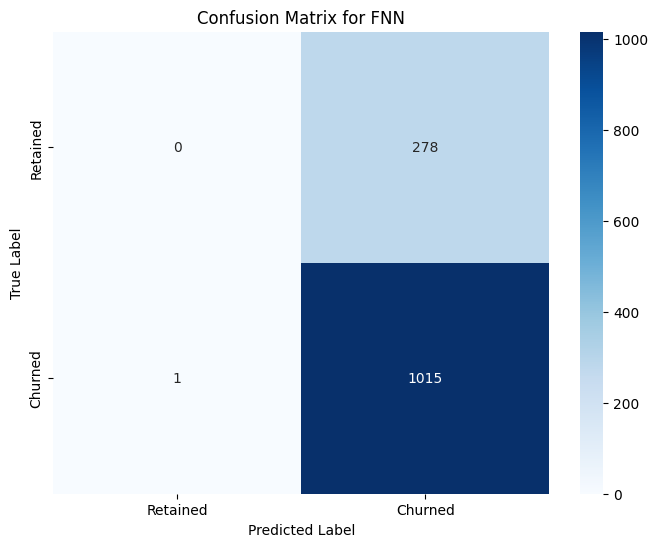

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
models = {
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "SVM": y_pred_svm,
    "Logistic Regression": y_pred_lr,
    "LSTM": y_pred_lstm,
    "FNN": y_pred_fnn
}

for model_name, y_pred in models.items():
    plot_confusion_matrix(y_test, y_pred, model_name)


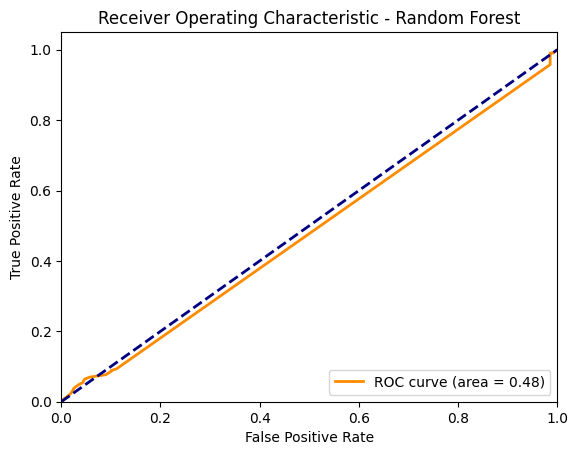

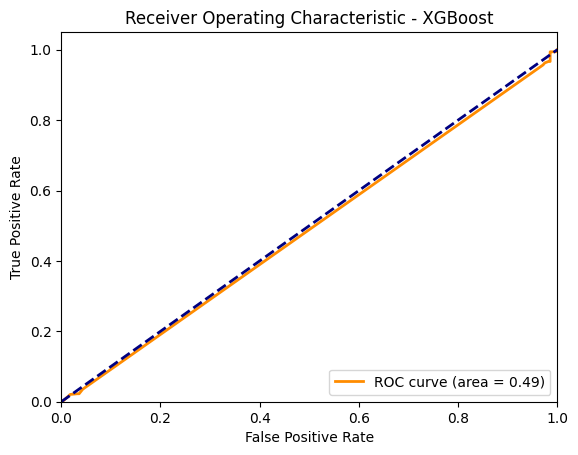

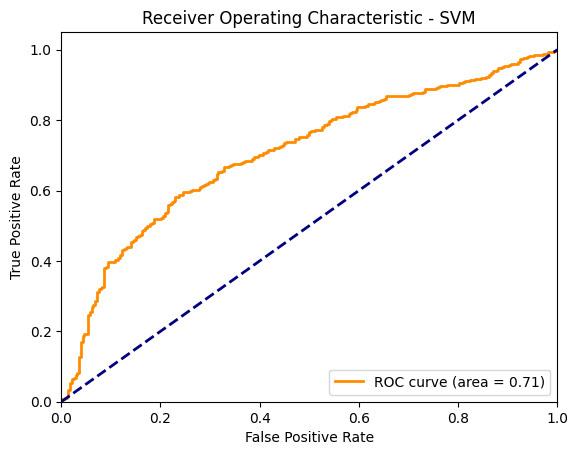

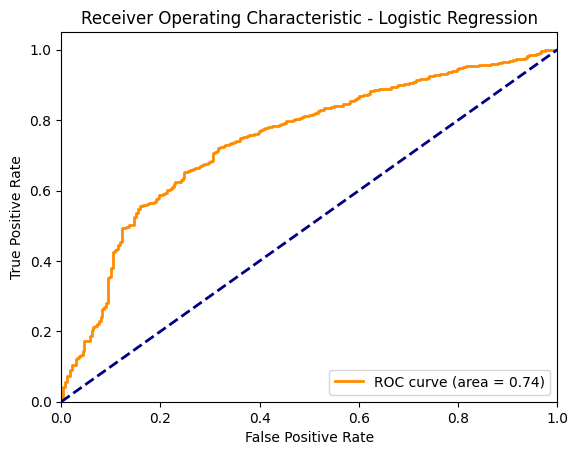

In [53]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for each model
plot_roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1], "Random Forest")
plot_roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1], "XGBoost")
plot_roc_curve(y_test, svm.decision_function(X_test_scaled), "SVM")
plot_roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1], "Logistic Regression")


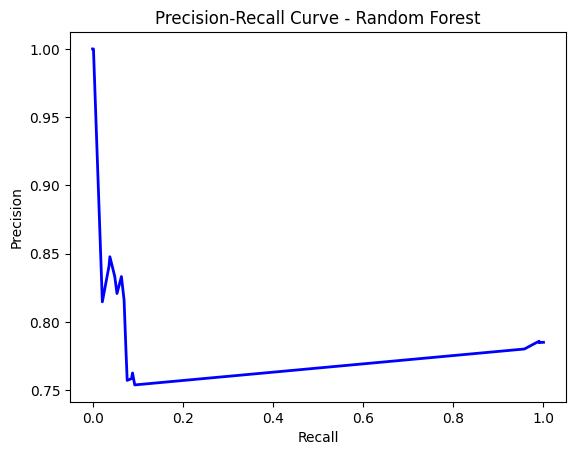

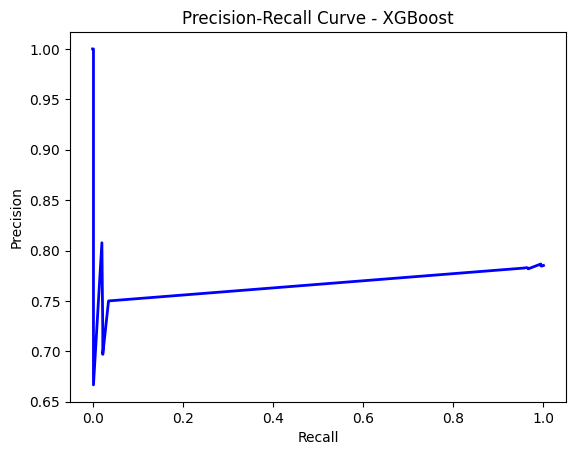

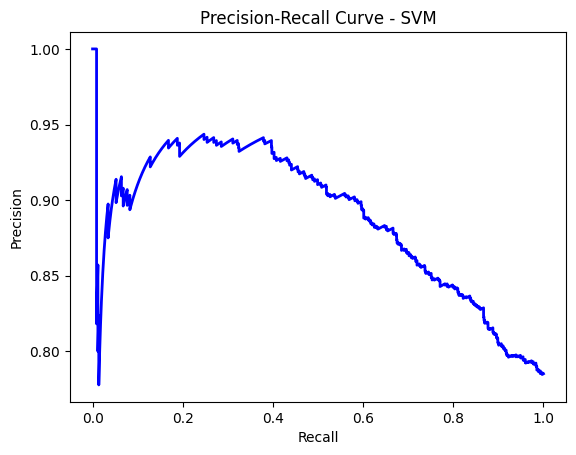

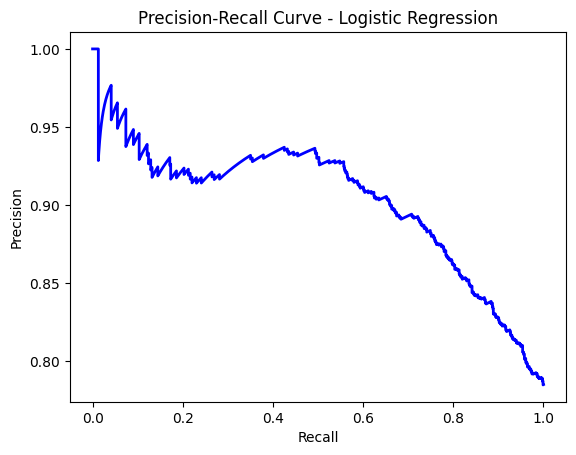

In [54]:
from sklearn.metrics import precision_recall_curve

# Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_pred_prob, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)

    plt.figure()
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()

# Plot Precision-Recall curve for each model
plot_precision_recall_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1], "Random Forest")
plot_precision_recall_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1], "XGBoost")
plot_precision_recall_curve(y_test, svm.decision_function(X_test_scaled), "SVM")
plot_precision_recall_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1], "Logistic Regression")
